In [15]:
import sys
import os
import subprocess

app_base_dir = '/home/spbproc/euso-spb-patt-reco-v1'
if app_base_dir not in sys.path:
    sys.path.append(app_base_dir)

import re
# import collections
import numpy as np
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as psql
import getpass
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 80

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from data_analysis_utils import *

Welcome to JupyROOT 6.10/00


In [2]:
con = con = pg.connect(dbname='eusospb_data', user='eusospb', host='localhost', password='1e20eVjemeuso')
cur = con.cursor()

In [3]:
all_simu_events_df = psql.read_sql('SELECT * FROM spb_processing_v3.simu_event OFFSET 0 LIMIT 100000', con) 

In [4]:
all_simu_events_df.head()

,simu_event_id,simu2npy_pathname,npyconv_pathname,num_frames,eheader_num,eheader_run,eheader_runname,eheader_random_seed,eheader_status,edetector_numphotons,...,egeometry_radius,egeometry_opticsradius,eelectronics_numactivegtus,eelectronics_gtustart,eelectronics_gtuend,eelectronics_numcells,eelectronics_timegtu0,eelectronics_timefirstgtu,eelectronics_timelastgtu,eelectronics_gtulength
0,1,/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_si...,/home/spbproc/SPBDATA_processed/spb_simu/posz_...,12,8,1234,Simu,2041217648,0,56785,...,600.0,600.0,0,-1,0,1,211985.0,5.368710e+12,-1.000000e+20,2500.0
1,15855,/media/node15_data2/SPBDATA_processed/spb_simu...,/home/spbproc/SPBDATA_processed/spb_simu/posz_...,18,2,1234,Simu,2429170145,0,91963,...,600.0,600.0,1065456802,-1,0,1,356664.0,5.368710e+12,-1.000000e+20,2500.0
2,19850,/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_si...,/home/spbproc/SPBDATA_processed/spb_simu/posz_...,18,30,1234,Simu,3193268778,0,49962,...,600.0,600.0,1071979659,-1,0,1,264612.0,5.368710e+12,-1.000000e+20,2500.0
3,22853,/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_si...,/home/spbproc/SPBDATA_processed/spb_simu/posz_...,16,93,1234,Simu,1981966793,0,14190,...,600.0,600.0,0,-1,0,1,225297.0,5.368710e+12,-1.000000e+20,2500.0
4,11931,/media/node15_data2/SPBDATA_processed/spb_simu...,/home/spbproc/SPBDATA_processed/spb_simu/posz_...,18,65,1234,Simu,1338908387,0,9083,...,600.0,600.0,0,-1,0,1,130404.0,5.368710e+12,-1.000000e+20,2500.0


In [11]:
all_simu_events_df['edetstatus_numgtu'].describe()

count    35781.000000
mean        12.494173
std          6.871975
min          1.000000
25%          6.000000
50%         11.000000
75%         18.000000
max         42.000000
Name: edetstatus_numgtu, dtype: float64

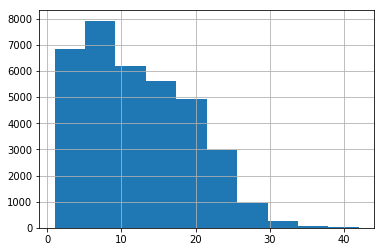

In [12]:
all_simu_events_df['edetstatus_numgtu'].hist()

/home/spbproc/SPBDATA_processed/spb_simu_kenji/slope1.5/posz_24750000.00/energy_4.63e+11/SPB0mm_b0.5_ev100_h24.75km_A17.7_slope1.5_S0073/simu2npy/ev_92_mc_1__signals.npy


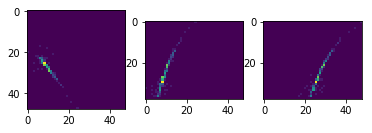

/home/spbproc/SPBDATA_processed/spb_simu/posz_24000000.00/energy_6.85e+12/simu.2017-07-22-20h27m06s/simu2npy/ev_62_mc_1__signals.npy


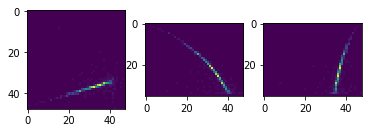

/home/spbproc/SPBDATA_processed/spb_simu_kenji/slope1.5/posz_24750000.00/energy_4.67e+11/SPB0mm_b0.5_ev100_h24.75km_A17.7_slope1.5_S0070/simu2npy/ev_71_mc_1__signals.npy


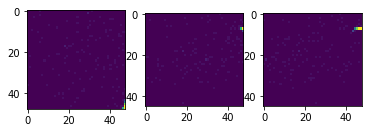

/home/spbproc/SPBDATA_processed/spb_simu_kenji/slope1.5/posz_24750000.00/energy_4.67e+11/SPB_b0.5_ev100_h24.75km_A17.7_slope1.5_S0070/simu2npy/ev_71_mc_1__signals.npy


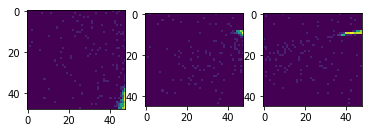

/home/spbproc/SPBDATA_processed/spb_simu_kenji/slope1.5/posz_24750000.00/energy_4.69e+11/SPB_b0.5_ev100_h24.75km_A17.7_slope1.5_S0083/simu2npy/ev_99_mc_1__signals.npy


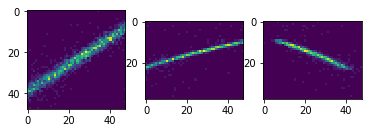

/home/spbproc/SPBDATA_processed/spb_simu/posz_18000000.00/energy_6.67e+12/simu.2017-07-23-05h40m12s/simu2npy/ev_9_mc_1__signals.npy


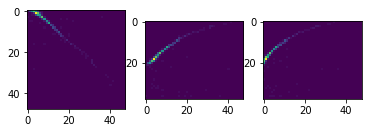

/home/spbproc/SPBDATA_processed/spb_simu_kenji/slope1.5/posz_24750000.00/energy_1.52e+12/SPB0mm_b0.5_ev100_h24.75km_A17.7_slope1.5_S0153/simu2npy/ev_20_mc_1__signals.npy


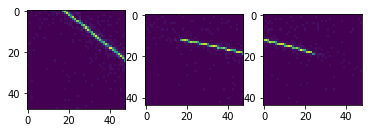

/home/spbproc/SPBDATA_processed/spb_simu_kenji/slope1.5/posz_24750000.00/energy_2.52e+12/SPB0mm_b0.5_ev100_h24.75km_A17.7_slope1.5_S0034/simu2npy/ev_54_mc_1__signals.npy


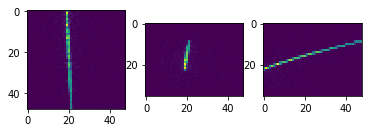

/home/spbproc/SPBDATA_processed/spb_simu_kenji/slope1.5/posz_24750000.00/energy_2.52e+12/SPB0mm_b0.5_ev100_h24.75km_A17.7_slope1.5_S0034/simu2npy/ev_59_mc_1__signals.npy


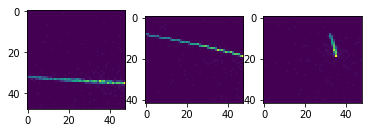

/home/spbproc/SPBDATA_processed/spb_simu_kenji/slope1.5/posz_24750000.00/energy_2.52e+12/SPB0mm_b0.5_ev100_h24.75km_A17.7_slope1.5_S0034/simu2npy/ev_87_mc_1__signals.npy


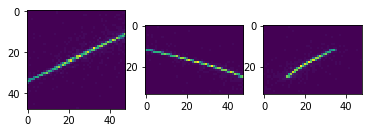

/home/spbproc/SPBDATA_processed/spb_simu/posz_18000000.00/energy_4.77e+12/simu.2017-07-19-13h49m31s/simu2npy/ev_9_mc_1__signals.npy


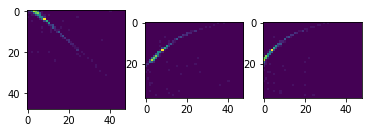

/home/spbproc/SPBDATA_processed/spb_simu_kenji/slope1.5/posz_24750000.00/energy_2.52e+12/SPB_b0.5_ev100_h24.75km_A17.7_slope1.5_S0034/simu2npy/ev_59_mc_1__signals.npy


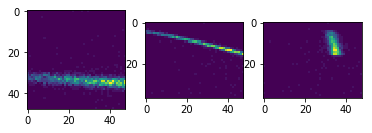

In [44]:
for i,f in enumerate(all_simu_events_df[all_simu_events_df['edetstatus_numgtu'] > 30]['npyconv_pathname'].iloc[40:]):
    simu_npy_pathname = acqnpy2simunpy(f)
    arr = np.load(simu_npy_pathname)
    arr_max_x_y = np.max(arr[:],axis=0)
    arr_max_gtu_y = np.max(arr[:],axis=2)
    arr_max_gtu_x = np.max(arr[:],axis=1)
    print(simu_npy_pathname)
    fig, axs = plt.subplots(1,3)
    axs[0].imshow(arr_max_x_y)
    axs[1].imshow(arr_max_gtu_x)
    axs[2].imshow(arr_max_gtu_y)
    plt.show()
    if i > 10: break